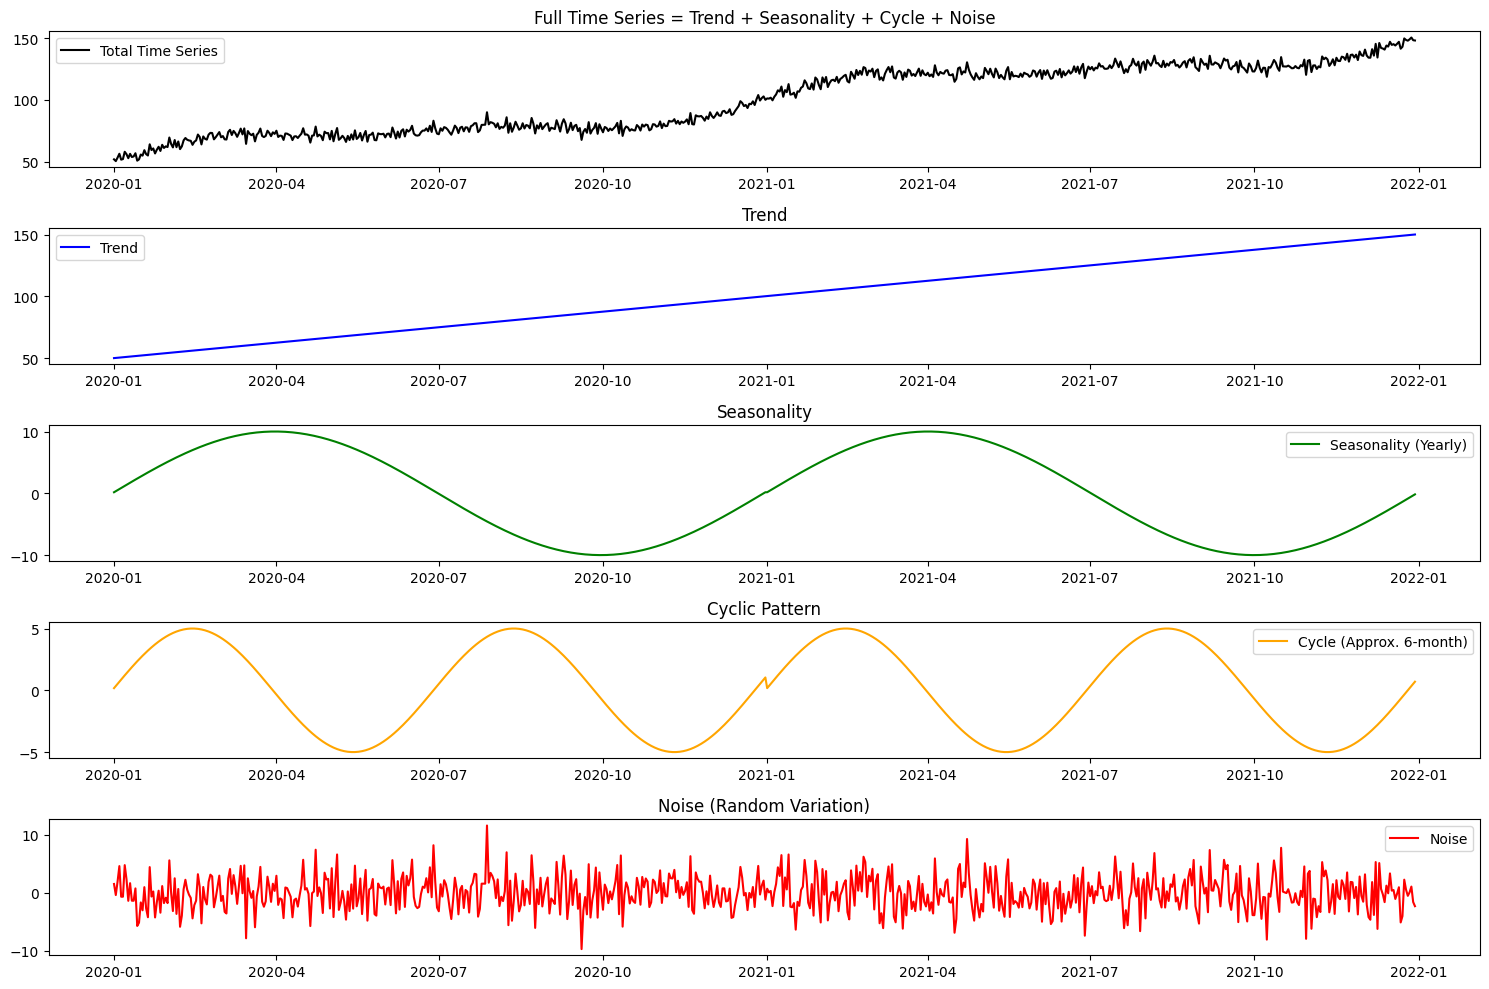

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create a date range (2 years of daily data)
date_range = pd.date_range(start='2020-01-01', periods=365*2, freq='D')

# Generate components
trend = np.linspace(50, 150, len(date_range))  # Long-term upward trend
seasonality = 10 * np.sin(2 * np.pi * date_range.dayofyear / 365)  # Yearly repeating pattern
cycles = 5 * np.sin(2 * np.pi * date_range.dayofyear / 180)  # Approx. 6-month cycle
noise = np.random.normal(0, 3, len(date_range))  # Random noise

# Combine all components into the final time series
sales = trend + seasonality + cycles + noise

# Create DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Sales': sales,
    'Trend': trend,
    'Seasonality': seasonality,
    'Cycle': cycles,
    'Noise': noise
})
df.set_index('Date', inplace=True)

# Plotting all components
plt.figure(figsize=(15, 10))

plt.subplot(5, 1, 1)
plt.plot(df['Sales'], label='Total Time Series', color='black')
plt.title("Full Time Series = Trend + Seasonality + Cycle + Noise")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(df['Trend'], label='Trend', color='blue')
plt.title("Trend")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(df['Seasonality'], label='Seasonality (Yearly)', color='green')
plt.title("Seasonality")
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(df['Cycle'], label='Cycle (Approx. 6-month)', color='orange')
plt.title("Cyclic Pattern")
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(df['Noise'], label='Noise', color='red')
plt.title("Noise (Random Variation)")
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulate 2 years of daily time series
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=730, freq='D')

# Create components
trend = np.linspace(50, 150, 730)
seasonality = 10 * np.sin(2 * np.pi * date_range.dayofyear / 365)
noise = np.random.normal(0, 3, 730)
sales = trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Sales': sales})
df.set_index('Date', inplace=True)

In [8]:
df

,Sales
Date,
2020-01-01,51.662276
2020-01-02,50.066597
2020-01-03,52.733611
2020-01-04,55.668636
2020-01-05,50.705885
...,...
2021-12-26,148.039705
2021-12-27,148.955755
2021-12-28,150.252200


In [9]:
# Decompose using additive model
decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='additive', period=365)


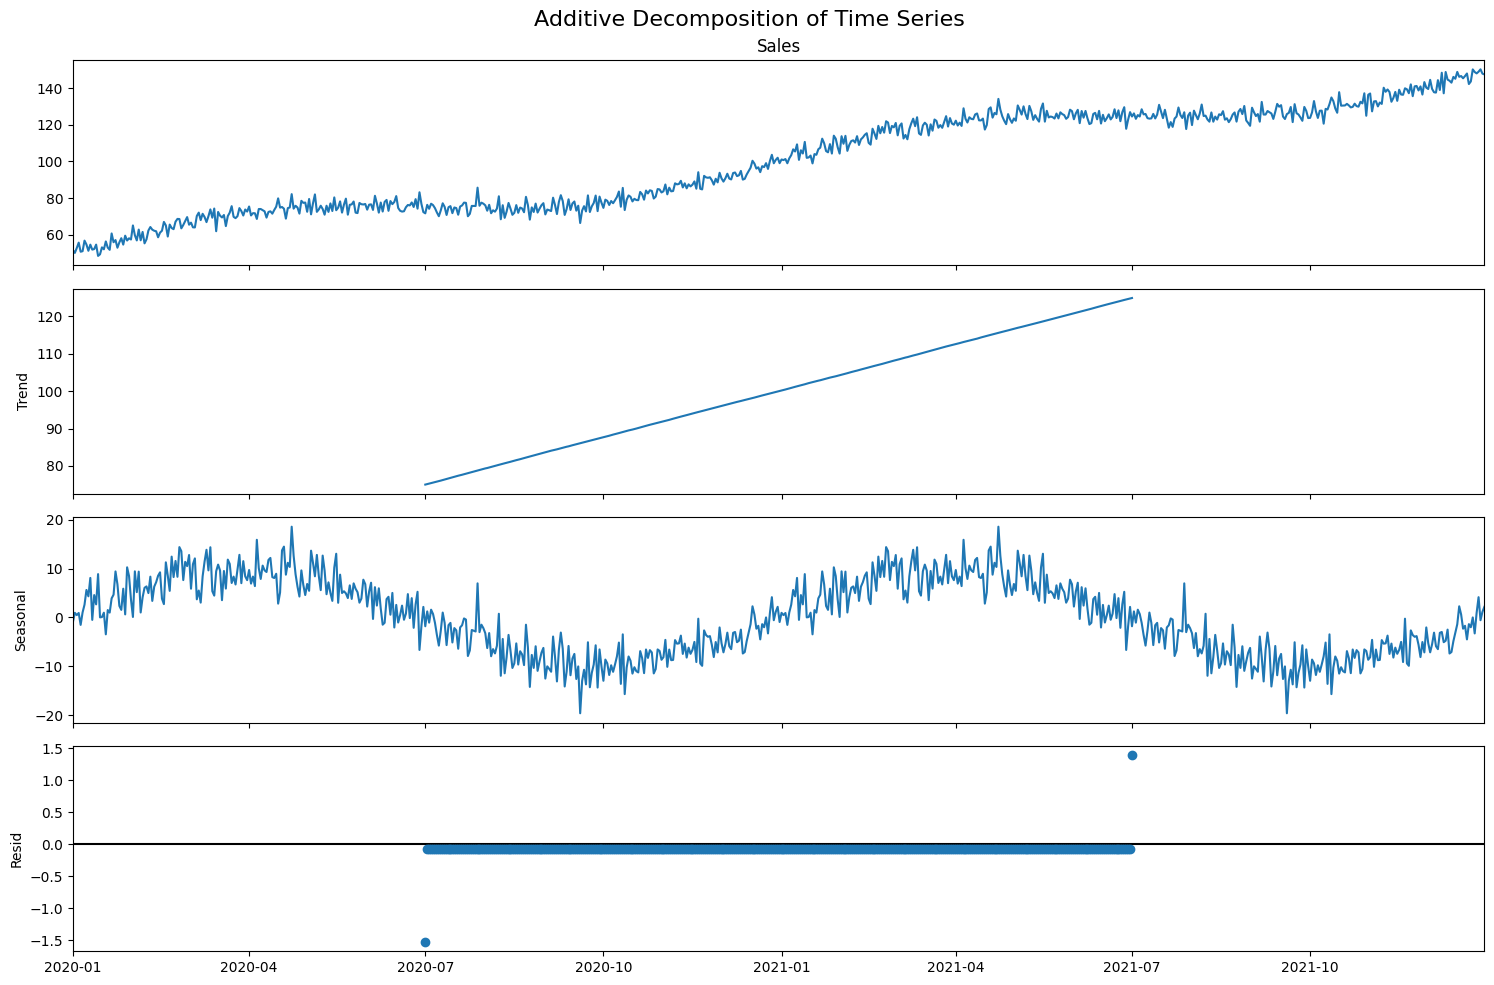

In [10]:
# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.suptitle("Additive Decomposition of Time Series", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

___

## ARIMA

- **A**uto**R**egressive **I**ntegrated **M**oving **A**verage

- learning from its past values and trends.


| Component  | Meaning        | What it does                                | Real-world idea                             |
| ---------- | -------------- | ------------------------------------------- | ------------------------------------------- |
| **AR (p)** | AutoRegressive | Uses past values                            | "Yesterday's sales affect today's sales"    |
| **I (d)**  | Integrated     | Makes the series stationary by differencing | Removes trend                               |
| **MA (q)** | Moving Average | Uses past errors (noise)                    | Learns from previous mistakes in prediction |


___

- ARIMA(p, d, q)
- p = number of AR terms
- d = number of differences needed to make the series stationary
- q = number of MA terms



___

- BAKERY DATA
- [100, 102, 104, 106, 108, 110]
- Sales are increasing → has a trend.
- ARIMA will:
  - Remove the trend (d)
  - Learn from past sales (AR)
  - Learn from past errors (MA)
  - Then predict the next sales

___

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulate time series data (with trend and noise)
np.random.seed(42)
data = pd.Series(np.arange(100, 200) + np.random.normal(0, 5, 100))


In [ ]:

# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 10 values
forecast = model_fit.forecast(steps=10)



In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data, label='Original Data')
plt.plot(np.arange(len(data), len(data)+10), forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast Example")
plt.show()


___

### Step-by-Step: How ARIMA Works
- Let’s break it into its 3 components:

> ARIMA(p, d, q) = AutoRegressive + Integrated + Moving Average

- Preprocessing (Integrated part — differencing)
- Fitting the model (AR + MA part)
- Making predictions
- Justifying predictions (evaluation)

___

### 1. Integrated (I) — Make Series Stationary
- **Goal**: Remove trend so the model can learn from stable data.

**Differencing:**

- [100, 102, 105, 108]
- You apply first difference:
  - [102-100, 105-102, 108-105] = [2, 3, 3]
- → Now the data is more stable (no upward trend).
-  This is called 1st-order differencing (d = 1).
- If still non-stationary, you can difference again (d = 2), etc.

___


###  2. AutoRegressive (AR) — Use Past Values

- This is like a linear regression on past values.
- ```p = 2``` <br><br>
- ```y_t = c + φ₁·y_{t−1} + φ₂·y_{t−2} + e_t```


- y_t = current value
- y_{t-1} = value at time t−1
- φ₁, φ₂ = model coefficients
- c = constant (intercept)
- e_t = error term (random noise)
- The model learns φ₁, φ₂ by minimizing error on training data.



___

### 3. Moving Average (MA) — Use Past Errors
- The model also looks at errors made in the past.
- For ```q = 1```:<br><br>
- ```y_t = μ + θ₁·e_{t−1} + e_t```<br><Br>
- ```θ₁``` = weight for last error<br><Br>
- ```e_{t-1}``` = error at time t−1


___

```y_t = c + φ₁·y_{t−1} + ... + φₚ·y_{t−p} + θ₁·e_{t−1} + ... + θ_q·e_{t−q} + e_t```


### 🔮 4. Prediction
Once the model learns:
- φ (AR terms)
- θ (MA terms)

___

Y_t = 0.6*Y_{t-1} + 0.2*Y_{t-2}
